# Ayudantía 7

## Clustering y PCA - Random Forest

In [18]:
# Imortamos nuestras librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

Trabajaremos con los datos de un análisis realizado a vinos cultivados en una región de Italia, pero en 3 viñas distintas. La variable target para problemas de clasificación se llama *class* y corresponde a la viña de origen del vino. Además tenemos 13 características de cada vino, todas variables numéricas.

In [2]:
# Leemos nuestros datos desde Google Drive
url = "https://drive.google.com/uc?id=139hcN82q3J615OjW0MY1PoUDgNCbVYKa"
df = pd.read_csv(url)
df.head()

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280%2FOD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
df.shape

(178, 14)

### Clustering
Realizaremos primero un clustering usando solo las variables *Alcohol* y *Color_intensity* para describir cada observación. Iniciaremos con 5 clusters y luego iremos refinando nuestro análisis:

In [4]:
# Instanciamos nuestro modelo de KMeans
kmeans = KMeans(n_clusters= 3)

columns = ['Alcohol', 'Malic_acid']

# Predecimos la etiqueta para cada observación
label = kmeans.fit_predict(df.loc[:,columns])

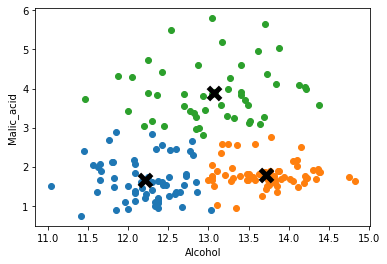

In [5]:
# Buscamos los valores únicos de las etiquetas (debería ser igual al número de clusters que buscamos)
u_labels = np.unique(label)
 
# Graficamos
 
for i in u_labels:
    plt.scatter(df.loc[label == i, columns[0]] , df.loc[label == i, columns[1]] , label = i)

# Agregamos los centros de cada cluster para visualizarlos

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker = "x", s=150,linewidths = 5, zorder = 10, c='black')

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

Ahora vamos a tratar de definir el número óptimo de clusters usando el Elbow method:

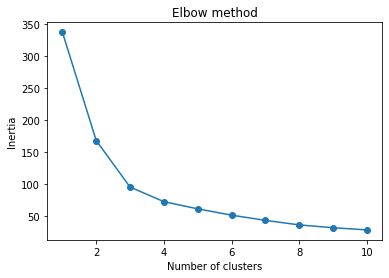

In [6]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.loc[:,columns])
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Pareciera ser que el número óptimo de clusters es 3 (coincide con el número de viñas pero recuerden que solo estamos usando 2 variables, podría haber sido distinto):

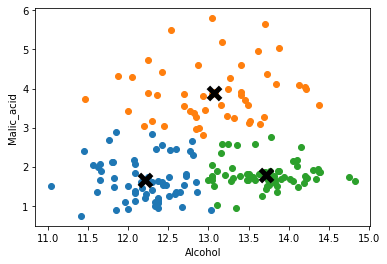

In [7]:
# Instanciamos nuestro modelo de KMeans
kmeans = KMeans(n_clusters= 3)
 
# Predecimos la etiqueta para cada observación
label = kmeans.fit_predict(df.loc[:,columns])

# Buscamos los valores únicos de las etiquetas (debería ser igual al número de clusters que buscamos)
u_labels = np.unique(label)
 
# Graficamos
 
for i in u_labels:
    plt.scatter(df.loc[label == i, columns[0]] , df.loc[label == i, columns[1]] , label = i)

# Agregamos los centros de cada cluster para visualizarlos

centroids = kmeans.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
plt.scatter(centroids_x,centroids_y,marker = "x", s=150,linewidths = 5, zorder = 10, c='black')

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

Como ejercicio de comparación, veamos cómo se comparan las clases reales de cada uno de nuestros vinos con lo que nos entrega el modelo de clustering usando solo dos variables:

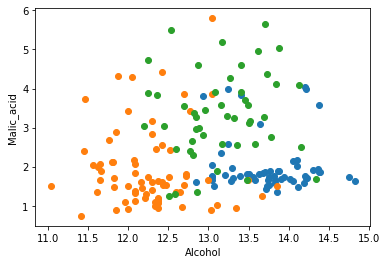

In [8]:
# Buscamos los valores únicos de las etiquetas (debería ser igual al número de clusters que buscamos)
label = df['class']
u_labels = np.unique(label)
 
# Graficamos
 
for i in u_labels:
    plt.scatter(df.loc[label == i, columns[0]] , df.loc[label == i, columns[1]] , label = i)

plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

### PCA

Ahora trabajaremos con todas las variables disponibles pero primero realizaremos una reducción de dimensionalidad usando PCA para reducir todo nuestro dataset a solo 2 features:

In [9]:
# Instanciamos nuestro modelo de PCA 
pca = PCA(2)
 
# Transformamos nuestros datos originales al nuevo espacio
df_pca = pca.fit_transform(df.drop('class', axis = 1))
 
df_pca.shape

(178, 2)

¿Cuánta varianza explican nuestras nuevas componentes?

In [10]:
var_exp = pca.explained_variance_ratio_
print(var_exp)
print('-'*70)
print(f"Total variance explained by PCA: {round(var_exp.sum(),4)*100}%")

[0.99809123 0.00173592]
----------------------------------------------------------------------
Total variance explained by PCA: 99.98%


Vemos que entre nuestras 2 componentes tenemos 99.98% de la varianza del dataset explicada, por lo tanto no es nada costoso reducir la dimensión de nuestro dataset. Incluso, como la primera componente explica 99.8% de la varianza podríamos solo utilizar una componente para reducir nuestro dataset casi sin perder información.

Dado que estamos explicando casi toda la varianza con una sola componente, si realizamos un clustering con distintos números de clusters deberíamos encontrar que la división de clusters se realiza solo tomando en consideración un eje en el gráfico:

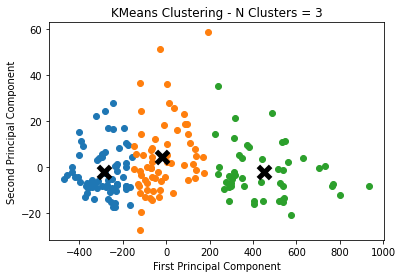

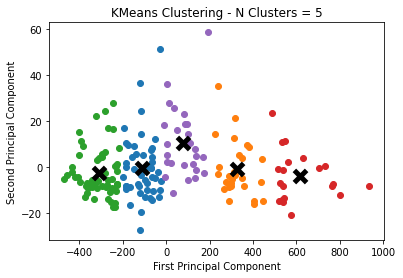

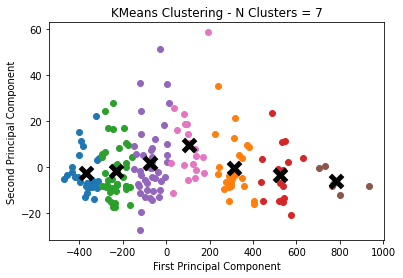

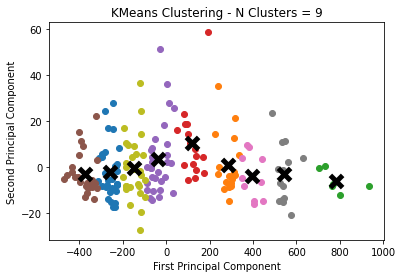

In [11]:
for n_clusters in [3,5,7,9]:
    # Instanciamos nuestro modelo de KMeans
    kmeans = KMeans(n_clusters= n_clusters)
    
    # Predecimos la etiqueta para cada observación
    label = kmeans.fit_predict(df_pca)

    # Buscamos los valores únicos de las etiquetas (debería ser igual al número de clusters que buscamos)
    u_labels = np.unique(label)
    
    # Graficamos
    
    for i in u_labels:
        plt.scatter(df_pca[label == i, 0] , df_pca[label == i, 1] , label = i)

    # Agregamos los centros de cada cluster para visualizarlos

    centroids = kmeans.cluster_centers_
    centroids_x = centroids[:,0]
    centroids_y = centroids[:,1]
    plt.scatter(centroids_x,centroids_y,marker = "x", s=150,linewidths = 5, zorder = 10, c='black')
    plt.title(f"KMeans Clustering - N Clusters = {n_clusters}")
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.show()

### Random Forest

Ahora entrenaremos un modelo de Random Forest para clasificar los datos de compras de ecommerce de la Tarea 2 (utilizando solo las variables numéricas) y analizaremos el impacto de los distintos hiperparámetros sobre los resultados:

In [33]:
# Leemos nuestros datos desde Google Drive
url = "https://drive.google.com/uc?id=1g4okI9BRkTjq0x2EH8HPMpFWAtDeic5K"
df = pd.read_csv(url)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [34]:
df = df.drop(['Month','OperatingSystems','Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'], axis = 1)

In [36]:
X = df.drop('Revenue', axis = 1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Empecemos con un Random Forest default:

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2044
        True       0.73      0.53      0.61       422

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466



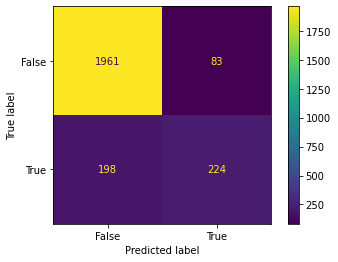

In [70]:
rf = RandomForestClassifier(
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Veamos qué pasa si cambiamos el número de árboles a utilizar:

              precision    recall  f1-score   support

       False       0.91      0.91      0.91      2044
        True       0.55      0.55      0.55       422

    accuracy                           0.85      2466
   macro avg       0.73      0.73      0.73      2466
weighted avg       0.85      0.85      0.85      2466



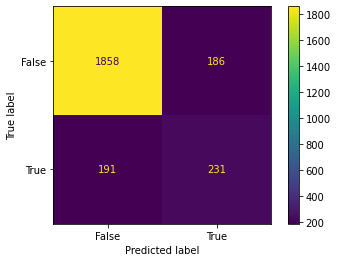

In [84]:
rf = RandomForestClassifier(
    n_estimators=1,
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2044
        True       0.73      0.52      0.61       422

    accuracy                           0.88      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.88      0.88      2466



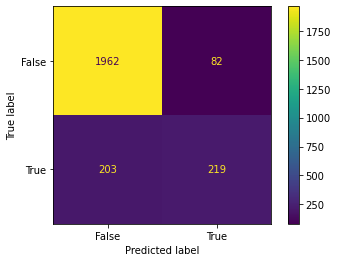

In [85]:
rf = RandomForestClassifier(
    n_estimators=10,
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2044
        True       0.72      0.53      0.61       422

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466



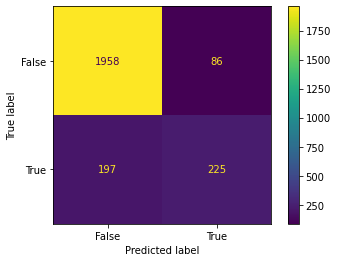

In [86]:
rf = RandomForestClassifier(
    n_estimators=1000,
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

¿Cómo influye el la profundidad máxima que le permitimos a los árboles?

              precision    recall  f1-score   support

       False       0.87      1.00      0.93      2044
        True       0.93      0.25      0.39       422

    accuracy                           0.87      2466
   macro avg       0.90      0.62      0.66      2466
weighted avg       0.88      0.87      0.83      2466



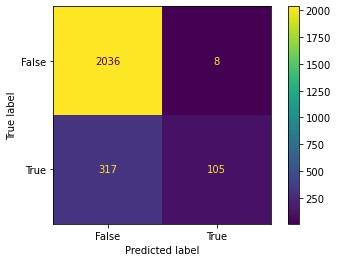

In [88]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

              precision    recall  f1-score   support

       False       0.91      0.96      0.93      2044
        True       0.75      0.52      0.62       422

    accuracy                           0.89      2466
   macro avg       0.83      0.74      0.78      2466
weighted avg       0.88      0.89      0.88      2466



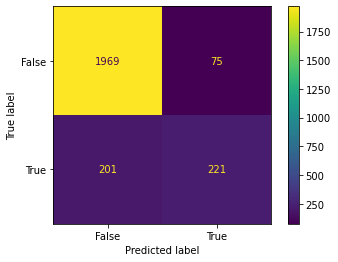

In [89]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Como nuestra target no está balanceada, experimentemos con distintas opciones para los pesos que le asignamos a cada clase:

              precision    recall  f1-score   support

       False       0.95      0.90      0.92      2044
        True       0.62      0.76      0.68       422

    accuracy                           0.88      2466
   macro avg       0.78      0.83      0.80      2466
weighted avg       0.89      0.88      0.88      2466



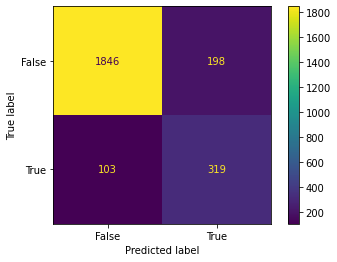

In [90]:
rf = RandomForestClassifier(
    n_estimators = 100,
    criterion='entropy',
    max_depth = 10,
    class_weight='balanced_subsample',
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

              precision    recall  f1-score   support

       False       0.98      0.29      0.45      2044
        True       0.22      0.97      0.36       422

    accuracy                           0.41      2466
   macro avg       0.60      0.63      0.41      2466
weighted avg       0.85      0.41      0.44      2466



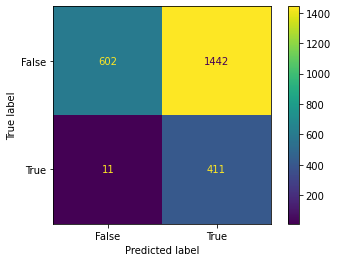

In [91]:
rf = RandomForestClassifier(
    n_estimators = 100,
    criterion='entropy',
    max_depth = 10,
    class_weight={False: 1, True: 2000},
    random_state = 0
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

Una ganancia de ocupar un Random Forest por sobre un único árbol es que podemos obtener una "probabilidad" de pertenencia a cada clase para cada una de nuestras predicciones, en lugar de simplemente obtener un 1 o un 0:

In [92]:
rf.predict_proba(X_test)

array([[0.22559516, 0.77440484],
       [0.63104133, 0.36895867],
       [0.16739534, 0.83260466],
       ...,
       [0.50517049, 0.49482951],
       [0.02288006, 0.97711994],
       [0.03015611, 0.96984389]])